In [154]:
import numpy as np 
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

sns.set_style('dark')

Loading the Training and Testing Dataset

In [155]:
train_dataset = pd.read_csv("./data/loan-train.csv")
test_dataset = pd.read_csv("./data/loan-test.csv")

In [156]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
train_dataset.shape

(614, 13)

In [158]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [159]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [160]:
train_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [161]:
def explore_object_type(df ,feature_name):   
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [162]:
columns = train_dataset.columns

In [163]:
for featureName in columns:
    if train_dataset[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(train_dataset, str(featureName))
        


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


Checking Missing Values

In [164]:
train_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

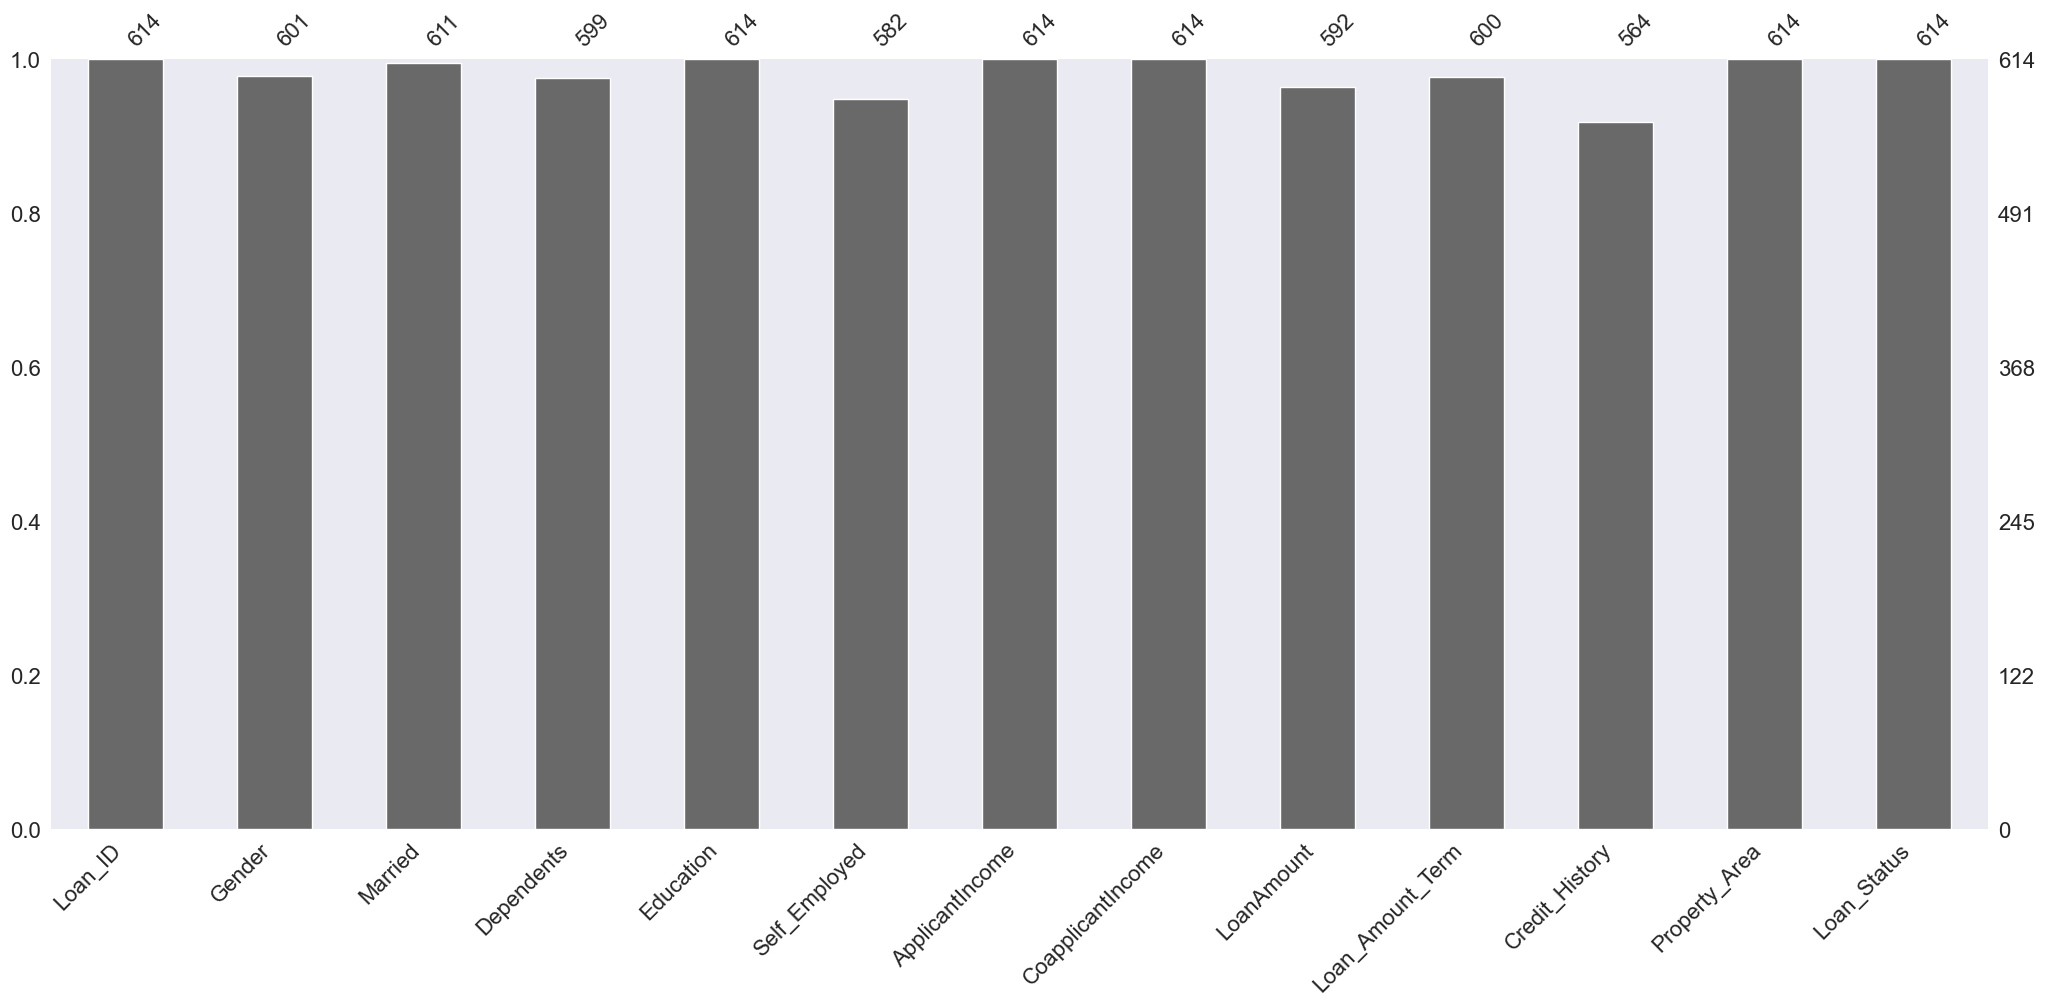

In [165]:
msno.bar(train_dataset)

<AxesSubplot: >

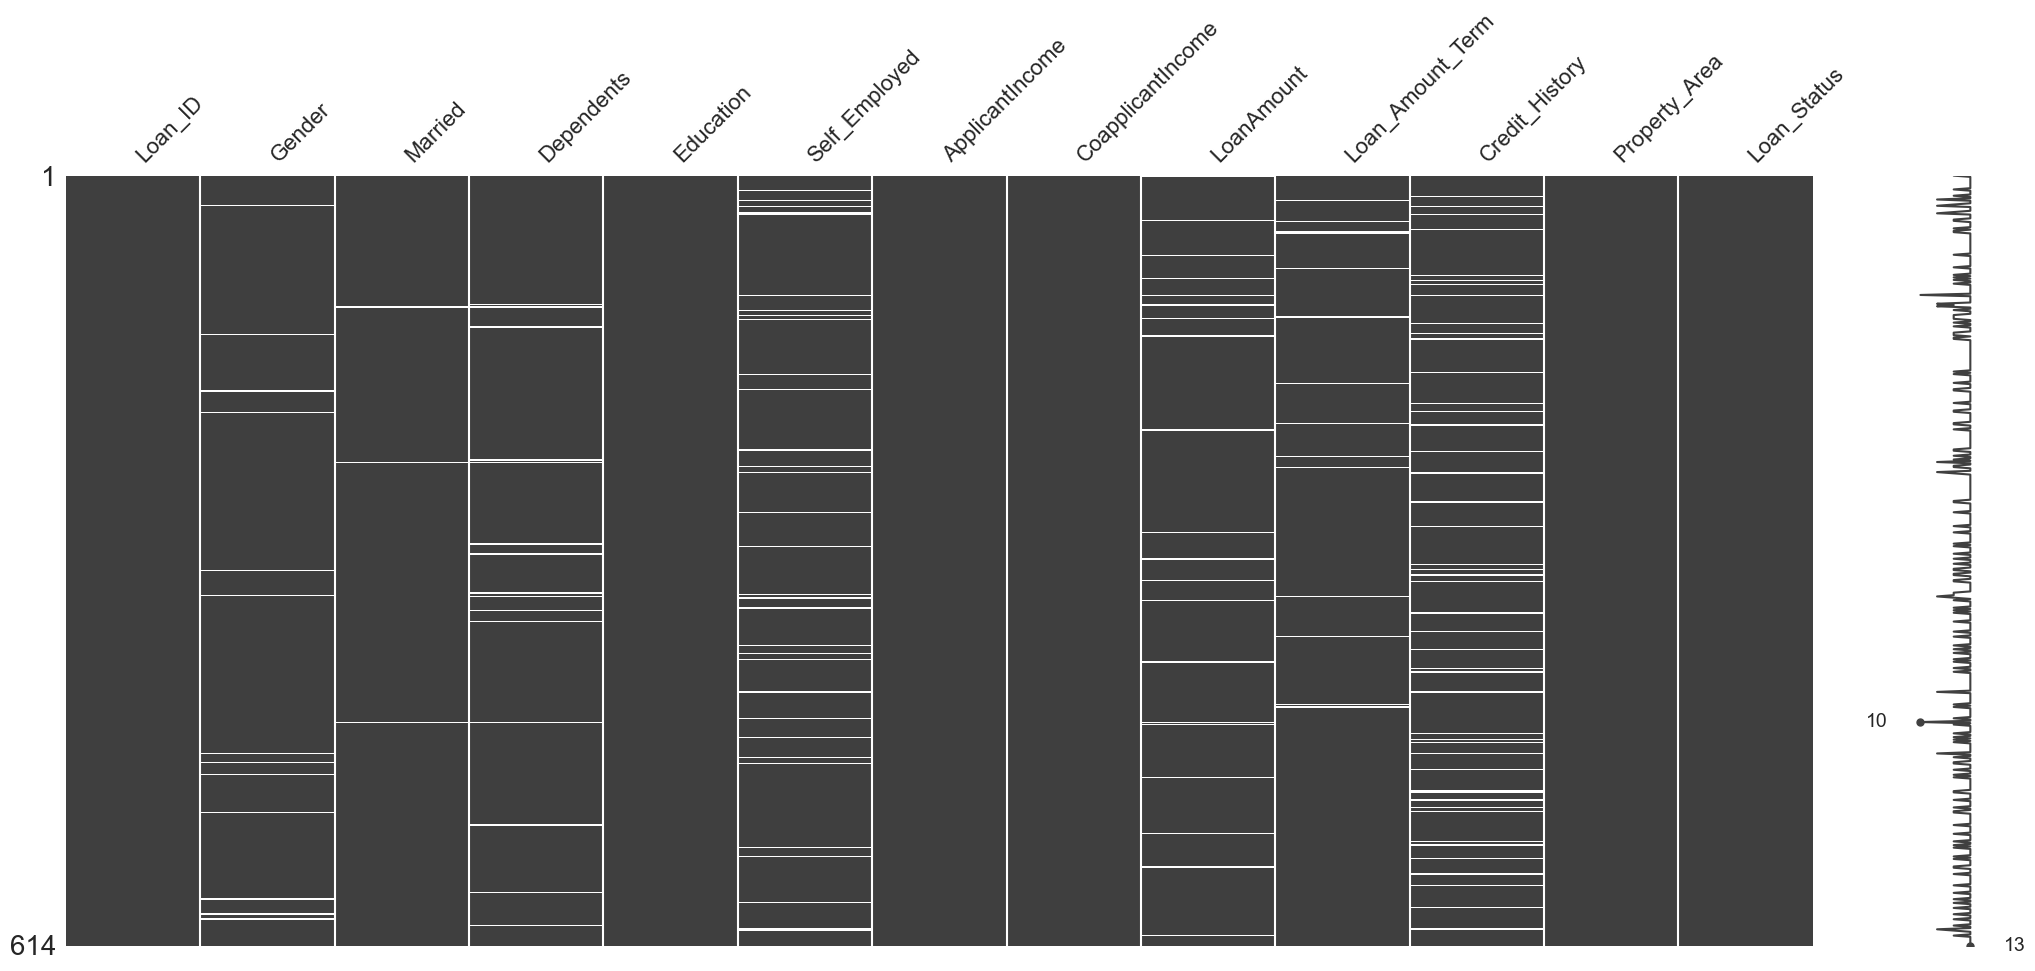

In [166]:
msno.matrix(train_dataset)

Filling NA Missing Values

In [167]:
train_dataset['Credit_History'].fillna(train_dataset['Credit_History'].mode(), inplace=True) 
test_dataset['Credit_History'].fillna(test_dataset['Credit_History'].mode(), inplace=True) 

In [168]:
train_dataset['LoanAmount'].fillna(train_dataset['LoanAmount'].mean(), inplace=True) 
test_dataset['LoanAmount'].fillna(test_dataset['LoanAmount'].mean(), inplace=True) 

In [169]:
train_dataset.Loan_Status = train_dataset.Loan_Status.replace({"Y": 1, "N" : 0})
#test_dataset.Loan_Status = test_dataset.Loan_Status.replace({"Y": 1, "N" : 0}) 

In [170]:
train_dataset.Gender = train_dataset.Gender.replace({"Male": 1, "Female" : 0})
test_dataset.Gender = test_dataset.Gender.replace({"Male": 1, "Female" : 0})


In [171]:
train_dataset.Married = train_dataset.Married.replace({"Yes": 1, "No" : 0})
test_dataset.Married = test_dataset.Married.replace({"Yes": 1, "No" : 0})

In [172]:
train_dataset.Self_Employed = train_dataset.Self_Employed.replace({"Yes": 1, "No" : 0})
test_dataset.Self_Employed = test_dataset.Self_Employed.replace({"Yes": 1, "No" : 0})

In [173]:
train_dataset['Gender'].fillna(train_dataset['Gender'].mode()[0], inplace=True)
test_dataset['Gender'].fillna(test_dataset['Gender'].mode()[0], inplace=True)

In [174]:
train_dataset['Dependents'].fillna(train_dataset['Dependents'].mode()[0], inplace=True)
test_dataset['Dependents'].fillna(test_dataset['Dependents'].mode()[0], inplace=True)

In [175]:
train_dataset['Married'].fillna(train_dataset['Married'].mode()[0], inplace=True)
test_dataset['Married'].fillna(test_dataset['Married'].mode()[0], inplace=True)

In [176]:
train_dataset['Credit_History'].fillna(train_dataset['Credit_History'].mean(), inplace=True)
test_dataset['Credit_History'].fillna(test_dataset['Credit_History'].mean(), inplace=True)

In [177]:

train_dataset['Loan_Amount_Term'].fillna(train_dataset['Loan_Amount_Term'].mean(), inplace=True)
test_dataset['Loan_Amount_Term'].fillna(test_dataset['Loan_Amount_Term'].mean(), inplace=True)

In [178]:
train_dataset['Self_Employed'].fillna(train_dataset['Self_Employed'].mode()[0], inplace=True)
test_dataset['Self_Employed'].fillna(test_dataset['Self_Employed'].mode()[0], inplace=True)

In [179]:
le = LabelEncoder()

feature_col = ['Property_Area','Education', 'Dependents']

for col in feature_col:
    train_dataset[col] = le.fit_transform(train_dataset[col])
    test_dataset[col] = le.fit_transform(test_dataset[col])

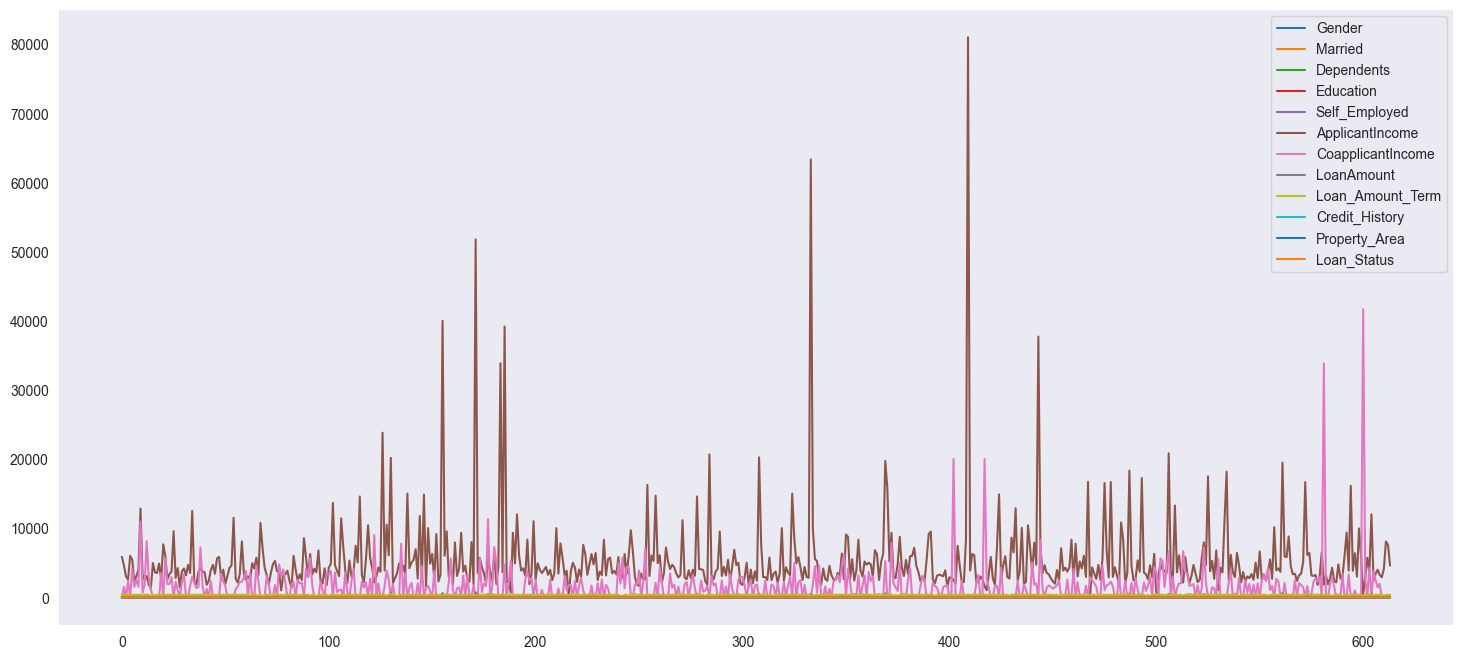

In [180]:
train_dataset.plot(figsize=(18, 8))

plt.show()

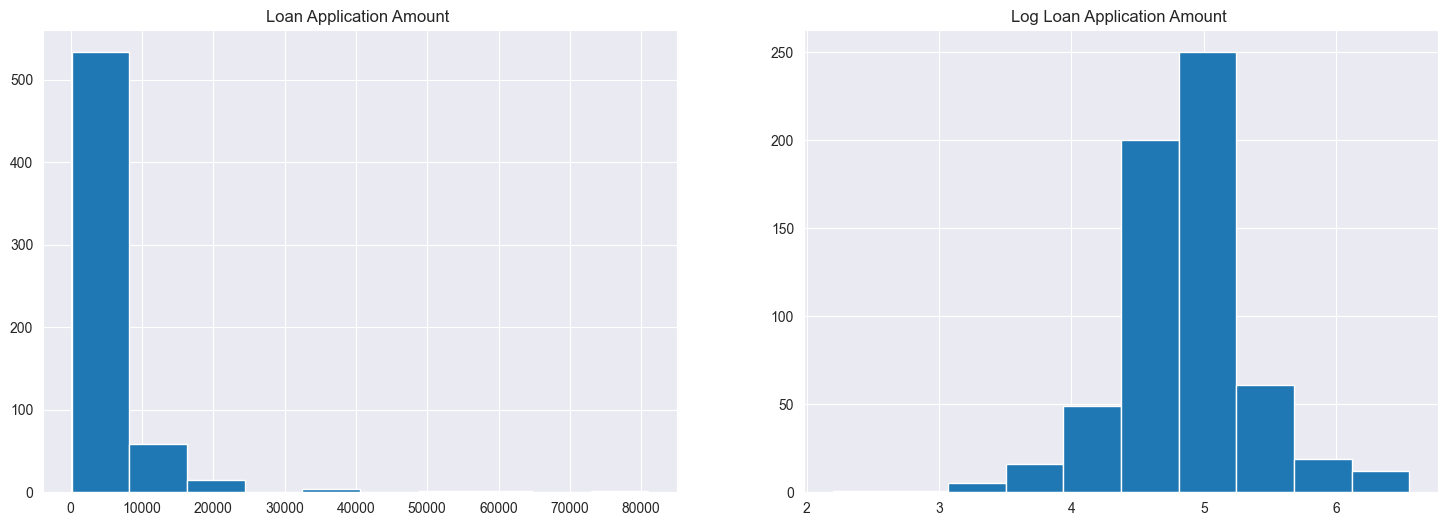

In [181]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train_dataset['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train_dataset['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

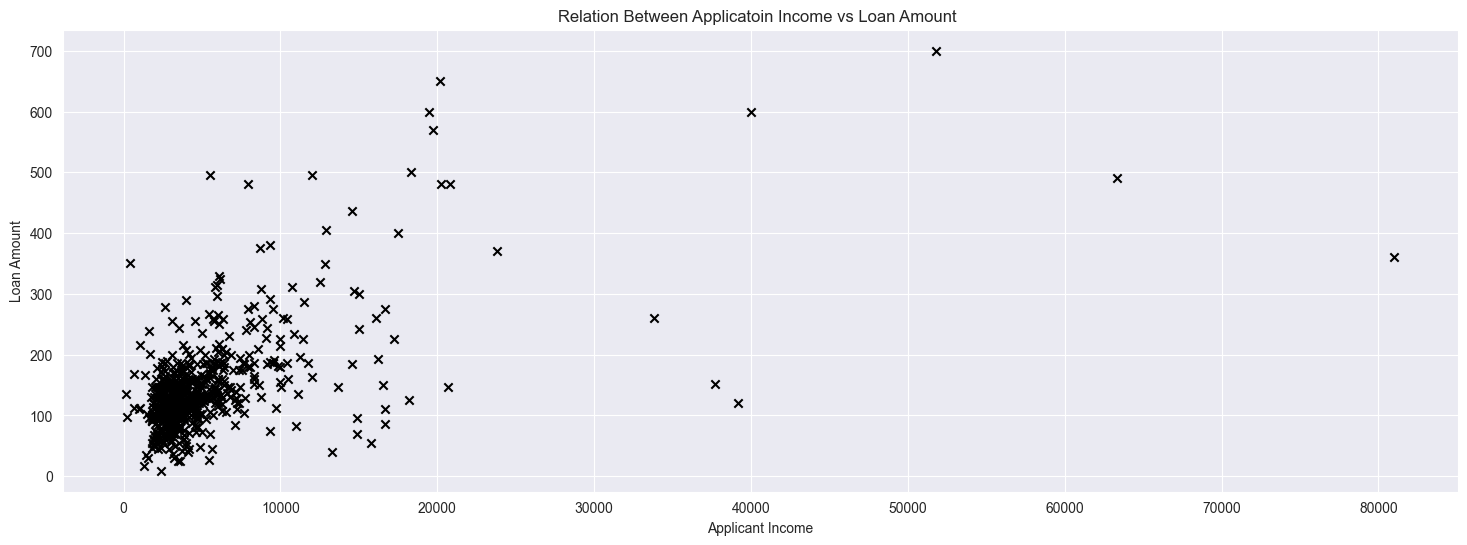

In [182]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(train_dataset['ApplicantIncome'] , train_dataset['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

C:\Users\luisj\AppData\Local\Temp\ipykernel_12548\559460450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


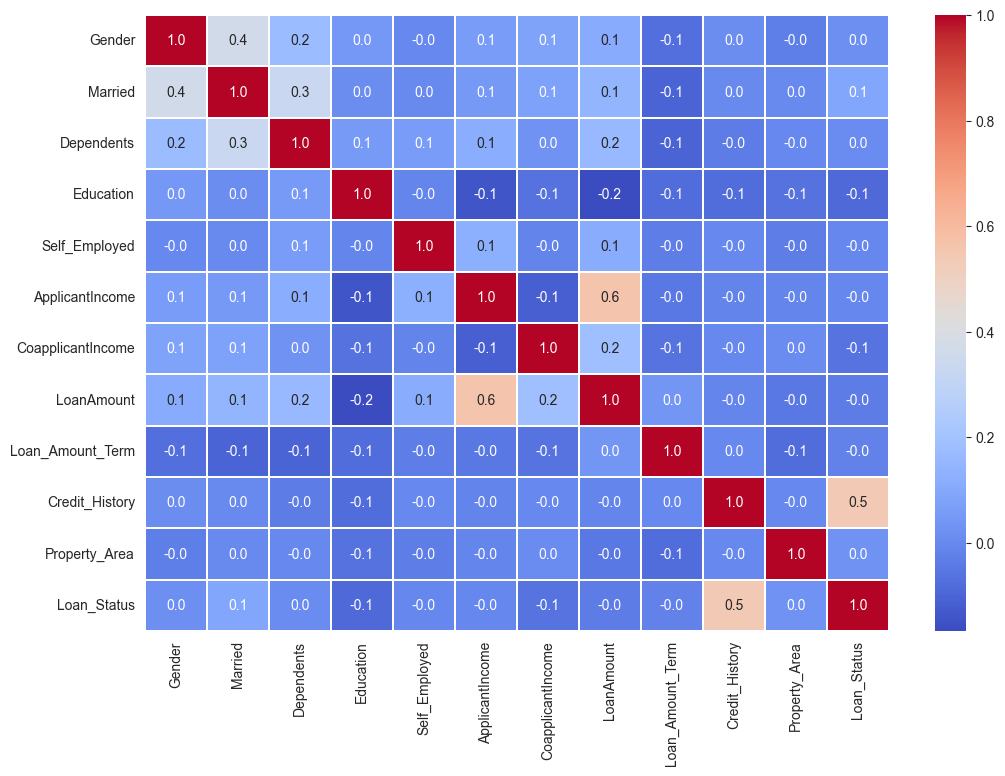

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(train_dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()


Logistic Regression Model

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [185]:
logistic_model = LogisticRegression()

In [186]:
features = ['Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_Train = train_dataset[features]
Y_Train = train_dataset[["Loan_Status"]]

X_Test = test_dataset[features]


Applying Standard Scaler

In [187]:
numerical_features = X_Train.select_dtypes(include=['float64', 'int64'])

numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

In [188]:
X_Train = ct.fit_transform(X_Train)
Y_Train = train_dataset[["Loan_Status"]]

X_Test = ct.transform(X_Test)

In [189]:
logistic_model.fit(X_Train, Y_Train)

c:\Users\luisj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Logistic Regression Model Accuracy:

In [190]:
score = logistic_model.score(X_Train, Y_Train)

print('Logistic Model accuracy_score overall :', score)
print('Logistic Model accuracy_score percent :', round(score*100,2))

Logistic Model accuracy_score overall : 0.8110749185667753
Logistic Model accuracy_score percent : 81.11


In [191]:
y_predicted = logistic_model.predict(X_Train)

print(sklearn.metrics.classification_report(Y_Train, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



Neural Network Model

In [192]:
num_features = len(features)

model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model.add(tf.keras.layers.Dense(units=128, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(units=64, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=32, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [193]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["acc"]
)

In [194]:
history = model.fit(
    X_Train, Y_Train, 
    batch_size=4, 
    epochs=40, 
    validation_split=0.2)

print("Model Trained")

Epoch 1/40
123/123 [==============================] - 1s 3ms/step - loss: 1.0382 - acc: 0.7515 - val_loss: 0.9059 - val_acc: 0.7967
Epoch 2/40
123/123 [==============================] - 0s 2ms/step - loss: 0.8756 - acc: 0.7943 - val_loss: 0.8295 - val_acc: 0.8049
Epoch 3/40
123/123 [==============================] - 0s 2ms/step - loss: 0.8290 - acc: 0.7902 - val_loss: 0.8204 - val_acc: 0.8211
Epoch 4/40
123/123 [==============================] - 0s 2ms/step - loss: 0.7255 - acc: 0.7963 - val_loss: 0.7552 - val_acc: 0.8130
Epoch 5/40
123/123 [==============================] - 0s 2ms/step - loss: 0.6940 - acc: 0.8024 - val_loss: 0.7147 - val_acc: 0.8211
Epoch 6/40
123/123 [==============================] - 0s 2ms/step - loss: 0.6648 - acc: 0.8024 - val_loss: 0.6735 - val_acc: 0.8293
Epoch 7/40
123/123 [==============================] - 0s 2ms/step - loss: 0.6469 - acc: 0.8086 - val_loss: 0.6200 - val_acc: 0.8293
Epoch 8/40
123/123 [==============================] - 0s 2ms/step - loss: 0.

Neural Network Model Accuracy:

In [203]:
y_predicted = model.predict(X_Train)

y_predicted = y_predicted.flatten()

y_predicted = np.where(y_predicted > 0.5, 1, 0)

print(sklearn.metrics.classification_report(Y_Train, y_predicted))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.49      0.64       192
           1       0.81      0.97      0.88       422

    accuracy                           0.82       614
   macro avg       0.85      0.73      0.76       614
weighted avg       0.84      0.82      0.81       614



Naive Bayes Model

In [196]:
from sklearn.naive_bayes import GaussianNB

In [197]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_Train, Y_Train)

c:\Users\luisj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Model Accuracy

In [198]:
y_pred = nb_model.predict(X_Train)
print(sklearn.metrics.classification_report(Y_Train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59       192
           1       0.79      0.96      0.87       422

    accuracy                           0.80       614
   macro avg       0.81      0.71      0.73       614
weighted avg       0.80      0.80      0.78       614



SVM Model

In [199]:
from sklearn.svm import SVC

In [200]:
svm_model = SVC()
svm_model = svm_model.fit(X_Train, Y_Train)

c:\Users\luisj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy:

In [201]:
y_pred = svm_model.predict(X_Train)
print(sklearn.metrics.classification_report(Y_Train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61       192
           1       0.80      0.99      0.88       422

    accuracy                           0.82       614
   macro avg       0.87      0.72      0.75       614
weighted avg       0.84      0.82      0.80       614



Predicting Loan Eligibility:

In [202]:
# 1 for Eligibility and 0 for Not Eligibility.

results = svm_model.predict(X_Test)

print(results)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
